# Used to test the fish + bacteria subcomponents #

In [21]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

from aquaponics import Aquaponics

In [30]:
a = Aquaponics('fish', 'bacteria', T0=29.3, Cm_0=.6, Cb_0=.01, kswitch=150)
m = a.get_model()

tf = 30
steps = tf * 5 + 1
m.time = np.linspace(0,tf,steps)

a.solve(glamdring=True, disp=False, imode=4)

8


Text(0.5,0,'Time (days)')

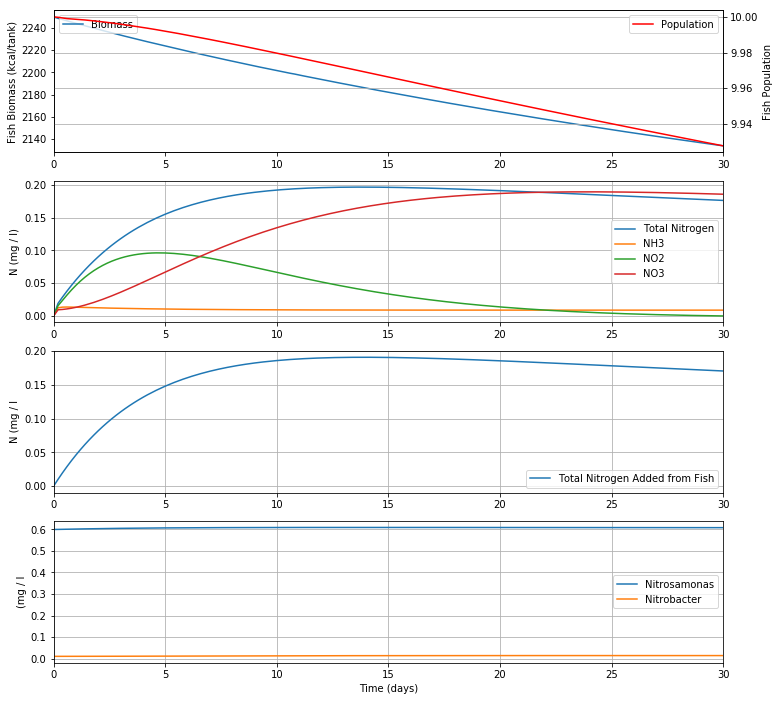

In [31]:
%matplotlib inline
plt.figure(figsize=(12,12))
ax = plt.subplot(411)
plt.plot(m.time, a.FB, label='Biomass')
plt.ylabel('Fish Biomass (kcal/tank)')
ax.legend(loc=2)
ax2 = ax.twinx()
plt.plot(m.time, a.FP, label='Population', color='r')
plt.grid()
plt.legend()
plt.ylabel('Fish Population')
ax2.legend(loc=1)

plt.subplot(412, sharex=ax)
plt.plot(m.time, a.INC, label='Total Nitrogen')
plt.plot(m.time, a.NH3, label='NH3')
plt.plot(m.time, a.NO2, label='NO2')
plt.plot(m.time, a.NO3, label='NO3')
plt.legend()
plt.grid()
plt.ylabel('N (mg / l)')

plt.subplot(413, sharex=ax)
plt.plot(m.time, a.NH3_exc, label='Total Nitrogen Added from Fish')
plt.legend()
plt.grid()
plt.ylabel('N (mg / l')

plt.subplot(414, sharex=ax)
plt.plot(m.time, a.Cm, label='Nitrosamonas')
plt.plot(m.time, a.Cb, label='Nitrobacter')
plt.legend()
plt.grid()
plt.ylabel('(mg / l')

plt.xlim(0, tf)
plt.xlabel('Time (days)')